## Hierarchical clustering

### Correlation matrix clustering featuring heatmap plot with seaborn

Combining https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb and https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/  
Adding Seaborn as it comes with more niceties.

In [1]:
import seaborn as sns
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb
    and converted to using Seaborn 
    and adding plotting only lower triangular of the matrix
    by Wayne 6-10-2020
    '''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr_df = df.corr()
    
    # make the mask based on https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
    mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
    #print( mask_ut)  # FOR DEBUGGING
    
    # Plot the correlation matrix
    '''
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    '''
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size+2, size))
    sns.heatmap(corr_df, mask=mask_ut, cmap="RdYlGn")

In [2]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.699115,1.288430,1.116478,1.584926,1.783983,0.230928,3.323088,1.520159,1.262317,0.619497,...,3.882676,-0.114501,-1.276506,-0.822254,1.926820,0.319851,0.878207,-0.598857,0.654113,1.561813
1,0.976951,-0.114885,0.626850,0.080281,1.536435,1.866043,1.182864,2.028451,1.228379,0.444532,...,2.301015,1.862823,1.271049,0.867050,0.465642,0.081298,3.043072,0.895321,0.871716,3.177271
2,1.214010,-1.282348,-1.990594,0.389051,-0.579938,0.151592,-2.093569,-0.089853,-0.308100,-0.501180,...,-1.130066,-0.430587,0.249810,0.734689,-0.935767,-1.040309,-0.382683,-1.804697,-1.630293,-0.766805
3,-1.484239,-1.488416,-0.447830,0.202580,0.037286,-0.875482,-0.511964,0.789098,0.373490,-0.146831,...,0.290779,0.655013,0.299317,0.019738,1.455822,0.286219,-0.279685,1.491738,1.619350,0.952967
4,0.364320,0.892239,0.173373,-0.151375,-0.673600,-0.660437,0.277040,-1.832652,-0.155862,-1.861210,...,0.389049,-1.774973,1.312454,0.398356,0.536858,0.126394,-0.647809,1.346517,-1.686693,-1.794383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.025837,2.474040,-2.166816,0.474338,-1.111104,-1.871434,0.049544,-0.155311,-2.626519,0.964464,...,1.100403,-1.063066,-0.835145,1.036819,0.092492,1.646108,-0.050012,-0.583173,-1.021053,1.729205
996,-1.601949,0.759834,-2.037437,-1.185608,-0.044627,-1.792304,-1.277215,-2.723702,-2.247444,0.821450,...,-1.120247,1.855250,-0.755284,0.746771,-0.039806,-1.179076,-1.608648,0.541393,-1.628000,1.699803
997,-1.393486,1.331994,-0.727104,-0.584614,-2.200470,-0.783415,-1.159065,-0.826562,-1.251046,-1.084637,...,-0.062127,-1.051217,-0.997922,-0.559489,-1.876503,0.685965,-0.898247,-1.055851,-1.874060,-0.297852
998,-0.197410,-0.632002,1.745526,1.714281,1.016729,2.994032,-1.400240,0.959510,-0.163398,3.889437,...,-0.396788,1.351579,1.194880,0.957377,1.240931,-0.011073,-0.180505,1.039832,0.055229,-1.620318


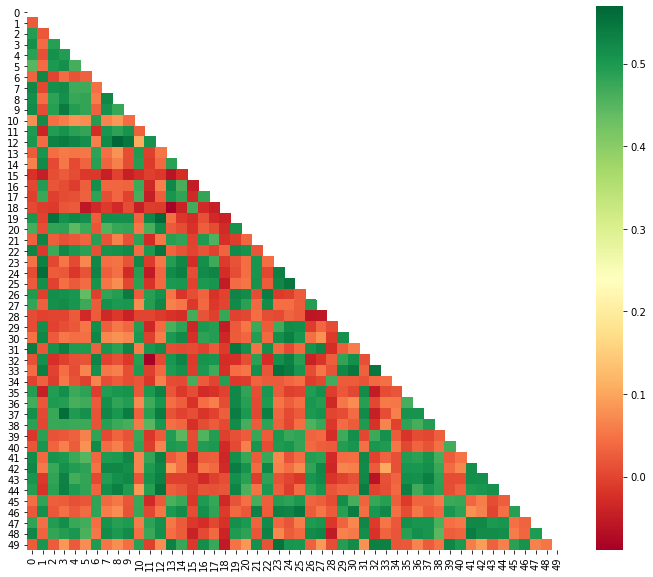

In [4]:
plot_corr(df, size=10)

### Demo of Hierarchical Clustering a Correlation matrix from the data (single-pass) using SciPy

*Code in the next cell has had been edited from original source by me, Wayne, to leave the input dataframe intact so that can use to compare as clustering happens more easily.*

number of clusters determined: 3
26 variables in cluster 1
4 variables in cluster 2
20 variables in cluster 3


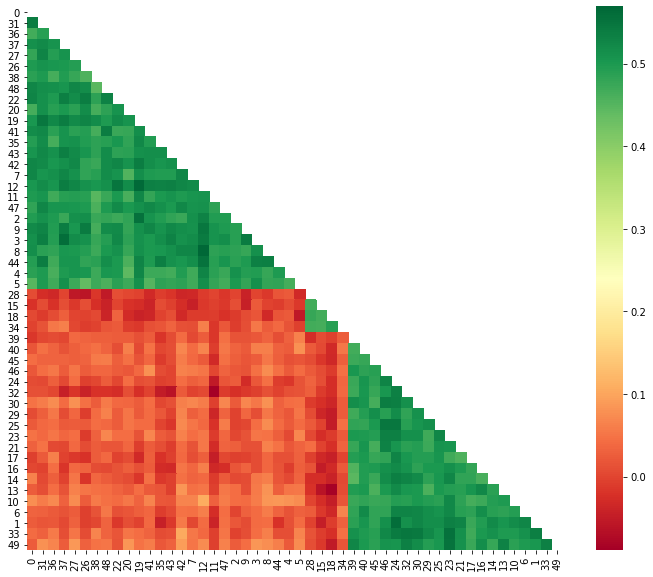

In [5]:
import scipy
import scipy.cluster.hierarchy as sch


X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated

print("number of clusters determined:",len(np.unique(ind)))
for x in np.unique(ind):
    class_members = [xc for xc in ind if xc == x]
    print(f"{len(class_members)} variables in cluster {x}")

plot_corr(df_clustered, size=10)

Going to record order for comparing to two-pass version under 'Obtaining and viewing the cluster membership without the rest of plot' below:

In [6]:
single_pass_order = df_clustered.columns

## Perform a two-pass clustering on the biggest clusters

The first pass is performed as earlier (see above), then for bigger clusters we re-cluster them individually. The source says, "We could easily extend this to an n-pass clustering until all sub-clusters are smaller than a threshold."

*I, Wayne, edited the code in next cell relative original source to leave the input dataframe intact so that can use to compare as clustering happens more easily.*

number of clusters determined: 3
26 variables in cluster 1
4 variables in cluster 2
20 variables in cluster 3


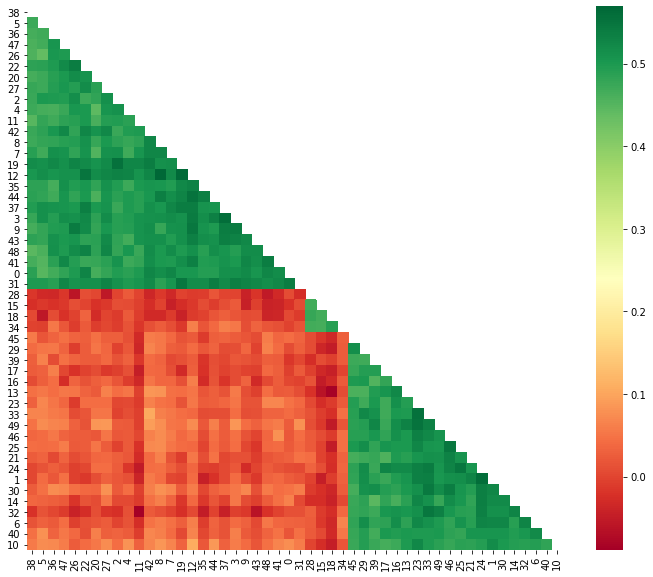

In [7]:
# Two pass clustering
# 1-We cluster the corr matrix
#   We sort the survey data according to this clustering
# 2-For cluster bigger than a threshold we cluster those sub-clusters
#   We sort the survey data according to these clustering

import scipy
import scipy.cluster.hierarchy as sch

cluster_th = 4

X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')


columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

print("number of clusters determined:",len(unique))
for x in np.unique(ind):
    class_members = [xc for xc in ind if xc == x]
    print(f"{len(class_members)} variables in cluster {x}")

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df_clustered[df_clustered.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind_sub = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind_sub)))]
        sub = sub.reindex(col, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df_clustered = df_clustered.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated

plot_corr(df_clustered, 10)

Did the two-pass yield a different order compared to the one-pass above?  
Going to record order for comparing to single-pass version via a code block under 'Obtaining and viewing the cluster membership without the rest of plot' below:

In [8]:
two_pass_order = df_clustered.columns

## How to extend?

I wondered how to implement the statement, "We could easily extend this to an n-pass clustering until all sub-clusters are smaller than a threshold." But my attempt below to brute-foce add some more passes without threshold test just kept giving same as two pass????

There's something I missing about what, "We could easily extend this to an n-pass clustering until all sub-clusters are smaller than a threshold."

In [ ]:
# More(? attempts) pass clustering


import scipy
import scipy.cluster.hierarchy as sch

cluster_th = 4

X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df_clustered = df.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

print("number of clusters determined:",len(unique))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df_clustered[df_clustered.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df_clustered = df_clustered.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated



X = df_clustered.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df_clustered.columns.tolist()[i] for i in list(np.argsort(ind))]
df_clustered = df_clustered.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df_clustered[df_clustered.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df_clustered = df_clustered.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated



X = df_clustered.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df_clustered.columns.tolist()[i] for i in list(np.argsort(ind))]
df_clustered = df_clustered.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df_clustered[df_clustered.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1) # this line updated from source because `df.reindex_axis()` deprecated
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df_clustered = df_clustered.reindex(columns, axis=1)# this line updated from source because `df.reindex_axis()` deprecated




plot_corr(df_clustered, 10)

## Obtaining and viewing the cluster membership without the rest of plot

Using approach worked out in `one row heatmap in seaborn.ipynb`.

Run code cell 1 through #5 at top of the notebook above first. (Or other similar clustering, such as the two-pass one above.)

In [9]:
# Membership report
# Prepare the data
data4df = ind
df4view = pd.DataFrame(data4df)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view = df4view.T
labels4df = sorted(list(df_clustered.columns))
df4view.columns = labels4df
# The process below (based on https://stackoverflow.com/a/52720936/8508004) is complex but works: 
# (it was worked out in the cell where I worked out the plotting visualization of 
# "Colored according to cluster membership")
df4viewreoriented = df4view.T
df4viewreoriented = df4viewreoriented.rename_axis('sample_ids')
df4viewreoriented.columns = ["cluster_num"]
df4viewreoriented = df4viewreoriented.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view = df4viewreoriented.T
# Report after data preparation
print("The members of each cluster in increasing order by cluster "
      f"and then label are:\n{list(df4view.columns)}")
clusterBYindex = zip(df4view.values[0].tolist(),list(df4view.columns))
from collections import defaultdict 
cluster_assignments = defaultdict(list)
for x in clusterBYindex:
    cluster_assignments[x[0]].append(x[1])
print("Cluster breakdown:")
for k,v in cluster_assignments.items():
    print(f"The {len(v)} members of cluster {k} are: {v}")

The members of each cluster in increasing order by cluster and then label are:
[0, 1, 2, 4, 6, 8, 11, 13, 15, 16, 17, 20, 25, 27, 30, 31, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49, 5, 12, 35, 46, 3, 7, 9, 10, 14, 18, 19, 21, 22, 23, 24, 26, 28, 29, 32, 36, 37, 38, 39, 45]
Cluster breakdown:
The 26 members of cluster 1 are: [0, 1, 2, 4, 6, 8, 11, 13, 15, 16, 17, 20, 25, 27, 30, 31, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49]
The 4 members of cluster 2 are: [5, 12, 35, 46]
The 20 members of cluster 3 are: [3, 7, 9, 10, 14, 18, 19, 21, 22, 23, 24, 26, 28, 29, 32, 36, 37, 38, 39, 45]


We'll assign the cluster assignments dictionary to a varuable so we can use it later to check if the assignments based on the cod above give the same result as when use Seaborn's clustermap alone (see below).

In [10]:
two_pass_cluster_results_as_dict = cluster_assignments 

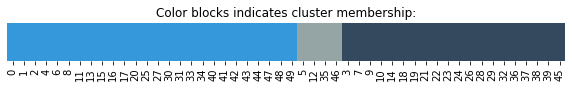

In [11]:
# Visualize members
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
data4df = ind
df4view = pd.DataFrame(data4df)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view = df4view.T
labels4df = sorted(list(df_clustered.columns))
df4view.columns = labels4df
#df4view = df4view.reindex(columns=sorted(df4view.columns)) # order dataframe based on column identifiers
# But this mock data don't have text labels and instead have indexes as column names and so
# MAYBE(?) need to use `pandas.DataFrame.sort_index` so it stays sorted when try next step to 
# sort by cluster number, but seems to not work!?!?!
#df4view = df4view.sort_index(axis=1) # order by column index for test demo data
#df4view = df4view.reindex(columns=sorted(df4view.columns))
#df4view = df4view.sort_values([0],axis=1) # order dataframe based on cluster membership
# The process below (based on https://stackoverflow.com/a/52720936/8508004) is complex but works: 
df4viewreoriented = df4view.T
df4viewreoriented = df4viewreoriented.rename_axis('sample_ids')
df4viewreoriented.columns = ["cluster_num"]
df4viewreoriented = df4viewreoriented.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view = df4viewreoriented.T

# Plot after data preparation
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # from https://seaborn.pydata.org/tutorial/color_palettes.html
flatui = [ "#3498db", "#9b59b6", "#95a5a6", "#2ecc71","#34495e"] # based on https://seaborn.pydata.org/tutorial/color_palettes.html
plt.figure(figsize=(10, 0.7)) #from https://stackoverflow.com/a/55173418/8508004
g = sns.heatmap(df4view, cmap=flatui,cbar=False) # hiding colorbar based 
# on https://stackoverflow.com/q/50454360/8508004

g.set_yticklabels([""]) # figured out riffing on info from https://stackoverflow.com/a/46235777/8508004
# and using `dir(g)` to see attributes available to alter
#g.set_yticks([0]) # this just seemed to move tick to top? So did `g.set_yticks([False])`
# hiding y ticks based on https://stackoverflow.com/a/12998531/8508004
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
)
g.set_xlabel("") # when added column name to make the sorting work I had to then turn off;
# used approach like mentioned above for determining `g.set_yticklabels([""])` above

plt.title("Color blocks indicates cluster membership:");

Now to finally check, did the two-pass yield a different order?

**Note this cell below returns to using the order of the clusters among each cluster, whereas the last two cells involved the order increasing by cluster and then label number.**

In [12]:
print(f"Single-pass and two-pass give same order of demo data:\n{list(single_pass_order) == list(two_pass_order)}")
if list(single_pass_order) != list(two_pass_order):
    print (f"single pass label order: {list(single_pass_order)}") 
    print (f"two pass label order: {list(two_pass_order)}") 

Single-pass and two-pass give same order of demo data:
False
single pass label order: [0, 47, 44, 43, 42, 41, 40, 34, 33, 31, 30, 27, 25, 48, 20, 17, 49, 15, 1, 2, 4, 6, 16, 11, 8, 13, 12, 46, 5, 35, 18, 45, 19, 3, 14, 21, 39, 38, 37, 7, 22, 32, 9, 10, 29, 28, 23, 26, 36, 24]
two pass label order: [33, 20, 44, 13, 40, 34, 31, 4, 11, 47, 8, 17, 6, 0, 25, 48, 30, 15, 16, 1, 49, 42, 27, 43, 2, 41, 12, 46, 5, 35, 7, 24, 3, 21, 14, 32, 22, 38, 36, 37, 28, 39, 10, 23, 26, 45, 9, 18, 19, 29]


They can by chance give same result; however, **if you run it several times, you'll see a greater frequency of cases** where the order within specific clusterings are different for the single-pass vs the two-pass. (That is the result above will be `False`.) The cluster members themselves will be the same since is determined in the first round and only sub-clusters are evaluated in the second pass of the two-pass approach.

### Seaborn clustermap

Adapting Seaborn clustermap example in the gallery, https://seaborn.pydata.org/examples/structured_heatmap.html, to the correlation matrix used as input in demos above. I originally thought Seaborn's clustermap seemed to do all steps of hierarchical clustering (since [the documentation](https://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=clustermap#seaborn.clustermap) mentions scipy methods that https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb uses and which above is based on) and ,**importantly** has better visualization of the realtionships than above. (However, when trying to implement it for the test data the notebook above uses, I realized the grouping information came from the input dataframe and not the grouping from the hierarchical clustering so there is a little bit of a cart before the hourse problem if you want to add the colors of the groups along the x and y axis in that they don't come out of the clustermap but are injected based on previous data. I wanted to color by cluster which depends on the hierarchical clustering so I don't see how to add without first calculating by a similar method. It seems meant to signify groupings define by other categories, such as species, and not clustering. Hmmmm. For more on that see the cell after the one below where I try to integrate data like used in above examples. UPDATE: oh wait. https://stackoverflow.com/a/34697479/8508004 lead me to think it may be ways to get underlying data. I ran `dir(cg)` and it looks like the organized data in the plot is accessible as `cg.data2d`? And that seems to match the order of the labels in the final plot. But what about clusters? [This](https://stackoverflow.com/a/31167710/8508004) looks like it may get it when it is simple, but doesn't if more than a few clusters and so I won't really explore it much since it isn't geralizable to where I may have dozens of clusters like in data that spurred me looking into this. Instead I can see if the order of the labels from the clustermap can be made using the individual clusters when scipy is used to cluster. That will tell me if clustermap gives same result as scipy methods that https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb uses so I can just use that route to get the clusters.)  
Here is [the gallery demo](https://seaborn.pydata.org/examples/structured_heatmap.html) running here:

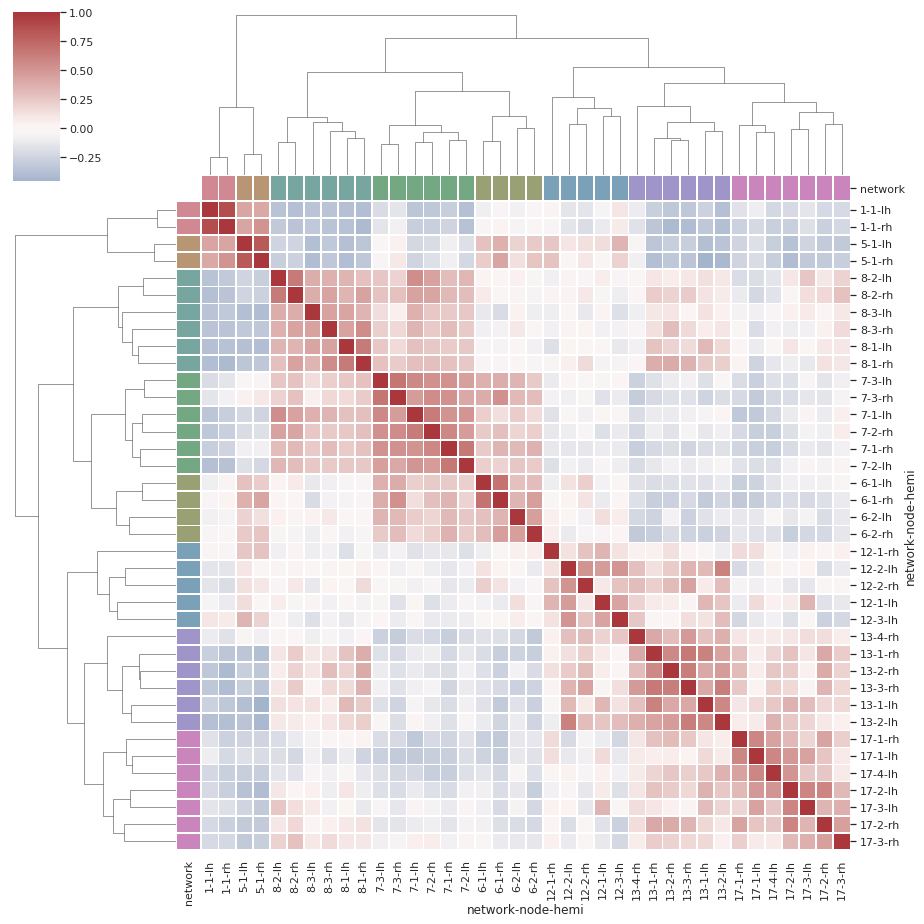

In [13]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df_demo = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df_demo.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df_demo = df_demo.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_demo.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df_demo.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df_demo.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));

Adapting that to the correlation matrix data used above:

(using methods like in case of https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb uses and which above is based on to see if more similar. Specifically, Linkage method was set to `complete` because seaborn clustermap seems to use average as default. The distance metric defaults to same thing used above and so that wasn't adjusted from seaborn clustermap default.)  
(Ended up using the calculations done as part of the demo above for this in order to color by cluster membership. So in reality I  am clustering the data separately twice to make such a plot.)

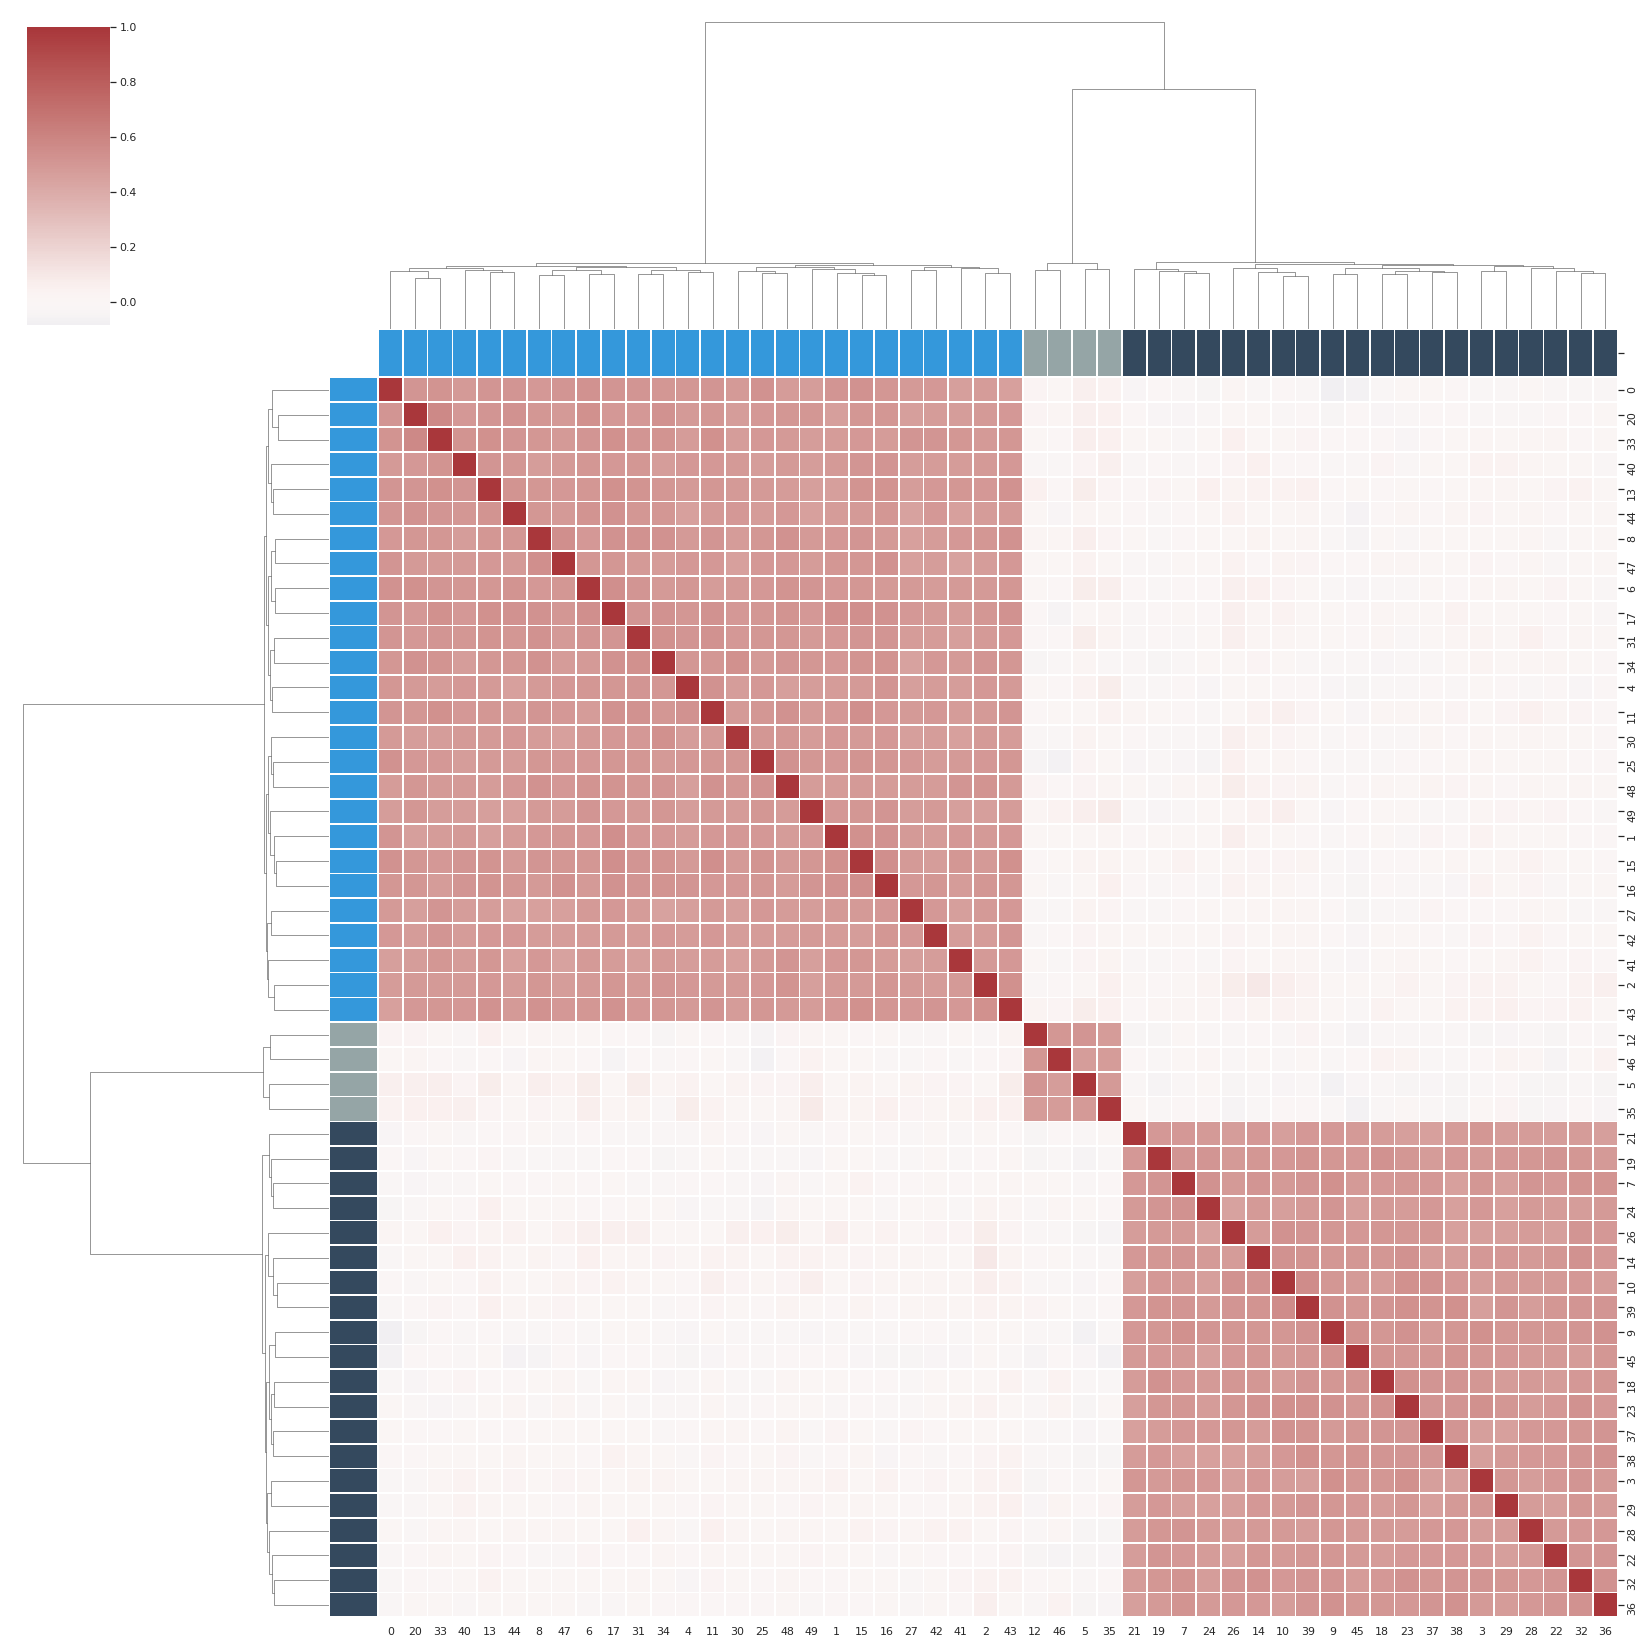

In [14]:
import pandas as pd
import seaborn as sns

# Data
# Use `df` from the start of the notebook above (based on 
#https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb example)

# Create a categorical palette to identify the networks; ended up using the calculations done
# as part of the demo above for this in order to color by cluster membership. So in reality I
# am clustering the data separately twice to make such a plot.
network_pal = sns.husl_palette(len(list(np.unique(ind))), s=.45)
flatui = [ "#3498db", "#9b59b6", "#95a5a6", "#2ecc71","#34495e"] # based on https://seaborn.pydata.org/tutorial/color_palettes.html
flatui = ["#3498db", "#95a5a6", "#34495e", "#e74c3c", "#34495e", "#2ecc71"]  # based on https://seaborn.pydata.org/tutorial/color_palettes.html
network_pal = sns.color_palette(flatui)
network_lut = dict(zip(map(int, list(np.unique(ind))), network_pal)) #need `int` and not `str` since used intergers in demo data

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = list(ind)
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
cg = sns.clustermap(df.corr(), method="complete", center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(23, 23)); #had to increase size substantially to get labels/indices clearly shown

Note: Double click on plot image to get larger, scrollable view where labels of rows and columns visible.

Also note: Had to increase size substantially from 13x13 to 23x23 to get labels/indices clearly shown.

That makes a nice visual with the clustering membership more obvious along with the heatmap. Plus you also get a dendrogram like I've seen for clustering hierarchical plots in the past. However, glad I found the one from https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb  first because that one makes it easier to get important information out. Plus there is the drawback you have to do the hierarchical clustering separately first if you want to use the clusters to color the x and y axis networks.

#### Using strict analysis of labels from clustermap to see if same order scipy clusters would give.

Since there doesn't look like a generalizable way to get clusters from cluster map while I can easly get the order of the labels (for the order of the lables, following from https://stackoverflow.com/a/34697479/8508004 where I realized I could execute `dir(cg)` and that lead me to believe the organized data in the plot is accessible as `cg.data2d` and that seems to match the order of the labels in the plot) perhaps I can see if the order of the labels from the clustermap can be made using the individual clusters when scipy is used to cluster. That will tell me if clustermap gives same result as scipy methods that https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb uses so I can just use that route to get the clusters. (Note this doesn't rely on sorting anything first because it will work even where labels are complex and not easily sorted, like the real data I'll be dealing with.)

In [15]:
clustermap_demo_labels = cg.data2d.columns.tolist()
two_pass_cluster_results_as_dict # data from scipy
print("Input:")
print(f"\tClustermap Labels:{clustermap_demo_labels}")
print(f"\t2Pass Clusters from SciPy:{list(two_pass_cluster_results_as_dict.values())}")
print("\n\nResults checking if clusters can be deconvoluted into label order seen for clustermap:")
current_cluster = None
found = []
label_order_is_generatable_from_clusters = False
for indx,e in enumerate(clustermap_demo_labels):
    if current_cluster == None:
        if e in [item for sublist in list(two_pass_cluster_results_as_dict.values()) for item in sublist]:
            for cluster_id,cluster in two_pass_cluster_results_as_dict.items():
                if e in cluster:
                    current_cluster = cluster
                    found.append(e)
                    if len(found) == len(cluster):
                        current_cluster = None
                        found = []
        else:
            print(f"The label {e} cannot be found among the two pass results.")
            label_order_is_generatable_from_clusters = False
            break
    elif e in current_cluster:
        #print(f"Checking: {e}") # FOR DEBUGGING
        found.append(e)
        if len(found) == len(current_cluster):
            print("labels vs. a cluster:")
            print(sorted(current_cluster))
            print(sorted(found))
            if indx == (len(clustermap_demo_labels)-1):
                label_order_is_generatable_from_clusters = True                
            else:
                current_cluster = None
                found = []
    else:
        label_order_is_generatable_from_clusters = False
        break
print(f"\nThe seaborn clustermap label order can be generated from the clusters:\n{label_order_is_generatable_from_clusters}")

Input:
	Clustermap Labels:[0, 20, 33, 40, 13, 44, 8, 47, 6, 17, 31, 34, 4, 11, 30, 25, 48, 49, 1, 15, 16, 27, 42, 41, 2, 43, 12, 46, 5, 35, 21, 19, 7, 24, 26, 14, 10, 39, 9, 45, 18, 23, 37, 38, 3, 29, 28, 22, 32, 36]
	2Pass Clusters from SciPy:[[0, 1, 2, 4, 6, 8, 11, 13, 15, 16, 17, 20, 25, 27, 30, 31, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49], [5, 12, 35, 46], [3, 7, 9, 10, 14, 18, 19, 21, 22, 23, 24, 26, 28, 29, 32, 36, 37, 38, 39, 45]]


Results checking if clusters can be deconvoluted into label order seen for clustermap:
labels vs. a cluster:
[0, 1, 2, 4, 6, 8, 11, 13, 15, 16, 17, 20, 25, 27, 30, 31, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49]
[0, 1, 2, 4, 6, 8, 11, 13, 15, 16, 17, 20, 25, 27, 30, 31, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49]
labels vs. a cluster:
[5, 12, 35, 46]
[5, 12, 35, 46]
labels vs. a cluster:
[3, 7, 9, 10, 14, 18, 19, 21, 22, 23, 24, 26, 28, 29, 32, 36, 37, 38, 39, 45]
[3, 7, 9, 10, 14, 18, 19, 21, 22, 23, 24, 26, 28, 29, 32, 36, 37, 38, 39, 45]

The seaborn clust

While I hoped this relationship would always hold that the clusters derived via SciPy would be seen to correspond to those seen in the clustermap label order, this turned out not to hold with real data that had 85 defined clusters. It simply could be some obscure setting in how the clustermap use of scipy works that I don't feel like tracking down, but I thought I could still get a sense of how many clusters do seem to correspond and how far things were off by modifying the code above to look by cluster. So I did that. Running it here to show it works for this demo data,too. (Plus as a further test I can trust the code I worked out.)

In [16]:
# To check how similar the clustermap labels are and the two-pass clusters direct 
# from SciPy. I'm going to take each cluster and find among the clustermap labels
# the start point of best corresponence to that cluster by first finding all the 
# indices of the cluster members among the clustermap labels, and then 
# take the index with the highest number of shared members when look over span
# of size of cluster to right of each member among the clustermap labels. For those 
# with no good correspondence, I'll report that.

def return_indices_among_clustermap(clust, labels_list):
    '''
    Takes:
    - cluster
    - clustermap labels

    Takes a cluster (list of members) and iterates over the members finding the 
    index of each among the clustermap labels.

    Returns:
    - a dict of with each cluster member as a key and the index among the
    clustermap labels as the value
    '''
    the_indices_dict = {}
    for x in clust:
        the_indices_dict[x] = labels_list.index(x)
    return the_indices_dict

def return_position_of_best_correspondence_among_clustermap(the_indices_dict, labels_list):
    '''
    Takes:
    - the dict of indices of cluster members (length of this is len(cluster))
    - clustermap labels

    Takes a dictionary with indices as values and finds position among the
    clustermap labels that corresponds to start of the best correspondence to
    the cluster. (In other words, which position has the most cluster members if
    you consider the labels in the clustermap labels to the right of the position
    spanning the size of the cluster.)

    Returns:
    - the start position of best correspondence to the cluster or returns
    the string saying `No_good_correspondence`.
    '''
    start_pos = None
    number_of_matches = 1
    length_cluster = len(the_indices_dict)
    cluster_members = the_indices_dict.keys()
    number_match_dict = {} #keys will the positions (values from the_indices_dict) with values being the number of members of cluster present from the span of the position through the size of the cluster beyond the position
    for x in the_indices_dict.values():
        upper_ind = len(labels_list) if (x+length_cluster) >len(labels_list) else(x+length_cluster)
        if len(set(labels_list[x:upper_ind]).intersection(set(cluster_members))) > 1:
            number_match_dict[x] = len(set(labels_list[x:upper_ind]).intersection(set(cluster_members)))
    # Now see if there is a single max and use that. For multiple occurences
    # say "No_good_correspondence" since no clear winner
    if number_match_dict.values():
        max_matches = max(number_match_dict.values())
        if list(number_match_dict.values()).count(max_matches) > 1:
            # since multiple occurences of the max number of matches, cannot call
            # a best corrospondece
            start_pos == None
        else:
            pos_with_max_matches = []
            for pos,matches in number_match_dict.items():
                if matches == max_matches:
                    pos_with_max_matches.append(pos)
            assert(len(pos_with_max_matches)) == 1, ("There should only be one best "
                "start position.")
            start_pos = pos_with_max_matches[0]
    if start_pos == None:
        return "No_good_correspondence"
    return start_pos

def tally_matches(start_pos, cluster, labels_list):
    '''
    Takes:
    - the starting index of the best correspondence to the cluster among the 
    clustermap labels
    - a cluster
    - clustermap labels

    Takes a start position, a cluster, and the clustermap labels and dtermines 
    the number of matches for the span that covers the size of the cluster starting at the point of best correspondence to the cluster.

    Returns:
    - Total number of matches for the span that covers the size of the cluster starting at the point of best correspondence to the cluster.
    '''
    upper_ind = len(labels_list) if (start_pos+len(cluster)) >len(labels_list) else(start_pos+len(cluster))
    return len(set(labels_list[start_pos:upper_ind]).intersection(set(cluster)))
    

clustermap_demo_labels = cg.data2d.columns.tolist()
two_pass_cluster_results_as_dict # data from scipy
num_clusters_fromScipy = len(two_pass_cluster_results_as_dict.values())
results_fractions = []
results_clusters = []
poor_clusters = []
for each_cluster in two_pass_cluster_results_as_dict.values():
    the_indices_dict = return_indices_among_clustermap(each_cluster, clustermap_demo_labels)
    cluster_pos = return_position_of_best_correspondence_among_clustermap(the_indices_dict, clustermap_demo_labels)
    if cluster_pos == "No_good_correspondence":
        print(f"There is no correspondence for {each_cluster}.")
        poor_clusters.append(each_cluster)
    else:
        cluster_matches = tally_matches(cluster_pos, each_cluster, clustermap_demo_labels)
        results_fractions.append(cluster_matches/len(each_cluster))
        results_clusters.append(each_cluster)

print("Results:")
print(f"From {num_clusters_fromScipy} clusters, the clustermap lacks clear matches to {len(poor_clusters)} of them.")
print(f"Here are the fraction of matches for each of the clusters that have clear correspondences:{results_fractions}")
print(f"Here are those {len(results_clusters)} clusters that have clear correspondences (in the same order as fractions on previous line):{results_clusters}")

Results:
From 3 clusters, the clustermap lacks clear matches to 0 of them.
Here are the fraction of matches for each of the clusters that have clear correspondences:[1.0, 1.0, 1.0]
Here are those 3 clusters that have clear correspondences (in the same order as fractions on previous line):[[0, 1, 2, 4, 6, 8, 11, 13, 15, 16, 17, 20, 25, 27, 30, 31, 33, 34, 40, 41, 42, 43, 44, 47, 48, 49], [5, 12, 35, 46], [3, 7, 9, 10, 14, 18, 19, 21, 22, 23, 24, 26, 28, 29, 32, 36, 37, 38, 39, 45]]


100% match to all three as expected given the results from the code in cell just above. This outcome gives me a bit more confidence when I use similar code to analyze more complex data, as now I have confirmed it at least will give something expected with simpler cluster data.




----

## Defining the number of clusters for hierarchical clustering

Sometimes , see [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Selecting-a-Distance-Cut-Off-aka-Determining-the-Number-of-Clusters) for example, you may want to argue for a certain number of clusters and want the herarchichal clustering algorithm to stick to that. Based on https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html, you'd use `criterion='maxclust'` and define *t* (second argument in call to `scipy.cluster.hierarchy.fcluster()`) as the number of clusters you want to specify. (Example setting k as defined based on other information is [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Knowing-k:); this is related to the case in the first sentence of this section that was linked [here](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Selecting-a-Distance-Cut-Off-aka-Determining-the-Number-of-Clusters).)

Example using first-pass example (fifth code cell if running notebook linearly) from above to specify two clusters:

number of clusters determined: 2
26 variables in cluster 1
24 variables in cluster 2


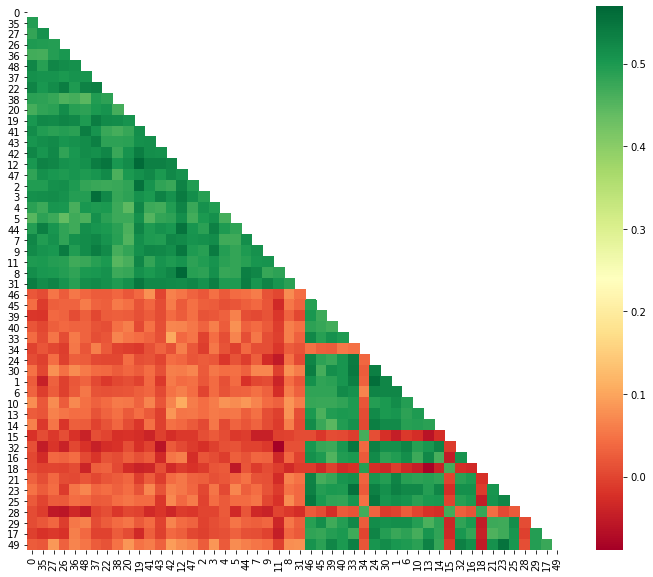

In [8]:
import scipy
import scipy.cluster.hierarchy as sch


X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
k = 2
ind = sch.fcluster(L, k, criterion='maxclust')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated

print("number of clusters determined:",len(np.unique(ind)))
for x in np.unique(ind):
    class_members = [xc for xc in ind if xc == x]
    print(f"{len(class_members)} variables in cluster {x}")

plot_corr(df_clustered, size=10)

Example using first-pass example (fifth code cell if running notebook linearly) from above to specify four clusters:

number of clusters determined: 4
7 variables in cluster 1
19 variables in cluster 2
4 variables in cluster 3
20 variables in cluster 4


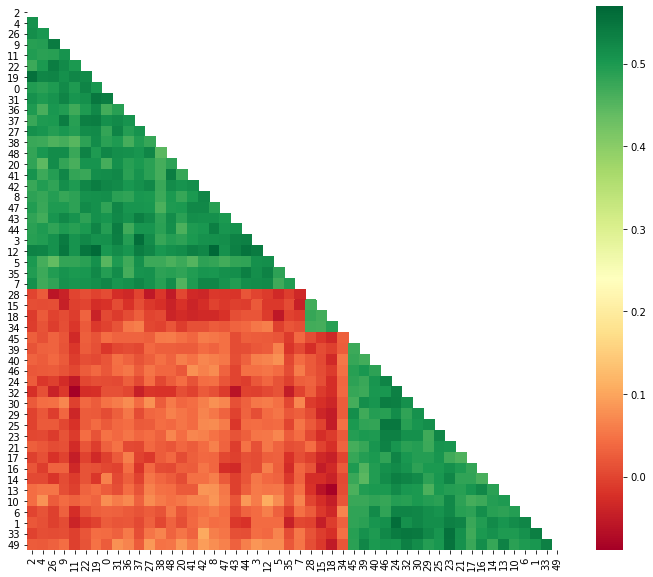

In [9]:
import scipy
import scipy.cluster.hierarchy as sch


X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
k = 4
ind = sch.fcluster(L, k, criterion='maxclust')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_clustered = df.reindex(columns, axis=1) # this line updated from source because `df.reindex_axis()` deprecated

print("number of clusters determined:",len(np.unique(ind)))
for x in np.unique(ind):
    class_members = [xc for xc in ind if xc == x]
    print(f"{len(class_members)} variables in cluster {x}")

plot_corr(df_clustered, size=10)

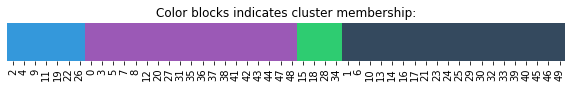

In [10]:
# Visualize members
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
data4df = ind
df4view = pd.DataFrame(data4df)  #<--- note DO NOT USE `pd.DataFrame.from_records` here
df4view = df4view.T
labels4df = sorted(list(df_clustered.columns))
df4view.columns = labels4df
#df4view = df4view.reindex(columns=sorted(df4view.columns)) # order dataframe based on column identifiers
# But this mock data don't have text labels and instead have indexes as column names and so
# MAYBE(?) need to use `pandas.DataFrame.sort_index` so it stays sorted when try next step to 
# sort by cluster number, but seems to not work!?!?!
#df4view = df4view.sort_index(axis=1) # order by column index for test demo data
#df4view = df4view.reindex(columns=sorted(df4view.columns))
#df4view = df4view.sort_values([0],axis=1) # order dataframe based on cluster membership
# The process below (based on https://stackoverflow.com/a/52720936/8508004) is complex but works: 
df4viewreoriented = df4view.T
df4viewreoriented = df4viewreoriented.rename_axis('sample_ids')
df4viewreoriented.columns = ["cluster_num"]
df4viewreoriented = df4viewreoriented.sort_values(by = ['cluster_num', 'sample_ids'], ascending = [True, True])
df4view = df4viewreoriented.T

# Plot after data preparation
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # from https://seaborn.pydata.org/tutorial/color_palettes.html
flatui = [ "#3498db", "#9b59b6", "#95a5a6", "#2ecc71","#34495e"] # based on https://seaborn.pydata.org/tutorial/color_palettes.html
plt.figure(figsize=(10, 0.7)) #from https://stackoverflow.com/a/55173418/8508004
g = sns.heatmap(df4view, cmap=flatui,cbar=False) # hiding colorbar based 
# on https://stackoverflow.com/q/50454360/8508004

g.set_yticklabels([""]) # figured out riffing on info from https://stackoverflow.com/a/46235777/8508004
# and using `dir(g)` to see attributes available to alter
#g.set_yticks([0]) # this just seemed to move tick to top? So did `g.set_yticks([False])`
# hiding y ticks based on https://stackoverflow.com/a/12998531/8508004
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
)
g.set_xlabel("") # when added column name to make the sorting work I had to then turn off;
# used approach like mentioned above for determining `g.set_yticklabels([""])` above

plt.title("Color blocks indicates cluster membership:");

----
----